In [1]:
# generalize kuramoto model

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.Integrator import RK4
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.14/'
Create_Folder(DF)

$m\ddot{\theta}+\dot{\theta} +Kr\sin\theta=\Omega$  
$\ddot{\theta}+\frac{\dot{\theta}}{m} +\frac{Kr}{m}\sin\theta=\frac{\Omega}{m}$  


In [3]:
def KURMAOTO_gen(y,t,omega,K,r,m):
    theta,dtheta = y
    ddtheta = (1/m)*(-dtheta + omega + K*r*np.sin( - theta))
    return np.array([dtheta,ddtheta])


def KURMAOTO_1st(y,t,omega,K,r,m):
    theta = y
    dtheta = omega - K*r*np.sin(theta)
    return np.array([dtheta])


# def Kuramoto_2nd_mf(Theta,t,omega,N,m,K):
#     if m != 0:
#         # print(f"Case m = {m}") 
#         theta,dtheta = Theta[:N],Theta[N:]
#         r,psi = get_order_parameter(theta,N)
#         ddtheta = (1/m)*(-dtheta + omega + K*r*np.sin(psi - theta))
#         return np.array([*dtheta,*ddtheta])
#     else:
#         # print("Case m = 0")
#         theta = Theta[:N]
#         r,psi = get_order_parameter(theta,N)
#         dtheta = omega + K*r*np.sin(psi - theta)
#         return np.array([*dtheta,*np.zeros(N)])
        

(9999,)


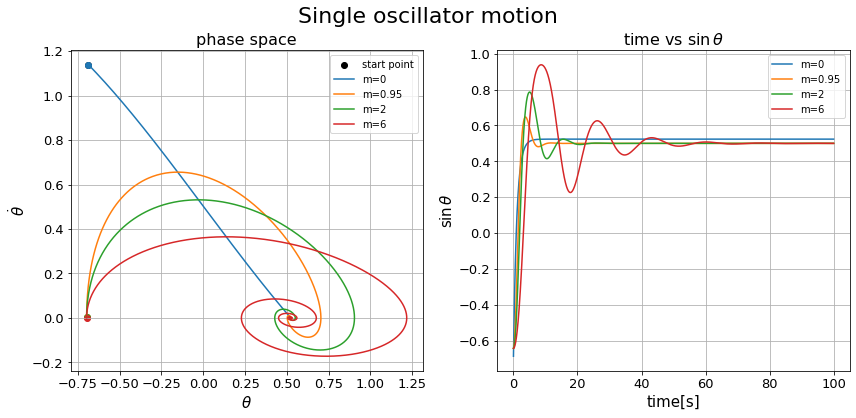

In [61]:
initial = np.deg2rad(-40)
t = np.arange(0,100,0.01)
K = 2
r = 0.5
m = 2
omega = 0.5
thetas_06 = RK4(KURMAOTO_gen,[initial,0],t,args=(omega,K,r,6))
make_theta = lambda m : RK4(KURMAOTO_gen,[initial,0],t,args=(omega,K,r,m))[:,0]
simulation = lambda m : RK4(KURMAOTO_gen,[initial,0],t,args=(omega,K,r,m))
make_theta_dtheta = lambda x : (x[:,0],x[:,1])
theta0 = RK4(KURMAOTO_1st,[initial],t,args=(omega,K,r,m))[:,0]
theta_095 = make_theta(0.95)
theta_2 = make_theta(2)
theta_6 = make_theta(6)
dtheta0 = np.diff(theta0)/0.01
theta0 = theta0[1:]
plt.figure(figsize=(12,6))
plt.subplot(121)
print(theta0.shape)
plt.scatter(theta0[0],dtheta0[0],color='black',label='start point')
plt.scatter(theta0[0],dtheta0[0])

plt.plot(theta0,dtheta0,label='m=0')
plt.subplot(122)
plt.plot(t[1:],theta0,label='m=0')
# plt.plot(t,np.sin(theta0),label='m = 0')
ms = [0.95,2,6]
for m in ms:
    
    sets = simulation(m)
    theta,dtheta= make_theta_dtheta(sets)
    dtheta = np.diff(theta)/0.01
    theta = theta[1:]
    plt.subplot(121)
    plt.scatter(theta[0],dtheta[0])
    plt.plot(theta,dtheta,label=f'm={m}')
    plt.subplot(122)
    
    plt.plot(t[1:],np.sin(theta),label=f'm={m}')
plt.subplot(121)
plt.legend()
plt.grid()
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'$\dot{\theta}$',fontsize=15)
plt.title('phase space',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.subplot(122)
plt.legend()
plt.grid()
plt.ylabel(r'$\sin{\theta}$',fontsize=15)
plt.xlabel(r'time[s]',fontsize=15)
plt.title(r'time vs $\sin{\theta}$',fontsize=16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.suptitle('Single oscillator motion',fontsize=22,y=0.96)
plt.tight_layout()
# plt.ylabel('time[s]'0
plt.savefig(DF+'Oscillator simple.png',dpi=400)

In [16]:
# dtheta0 = np.diff(theta0)/0.01
theta0.shape

(9999, 1)

In [15]:
5%2

1

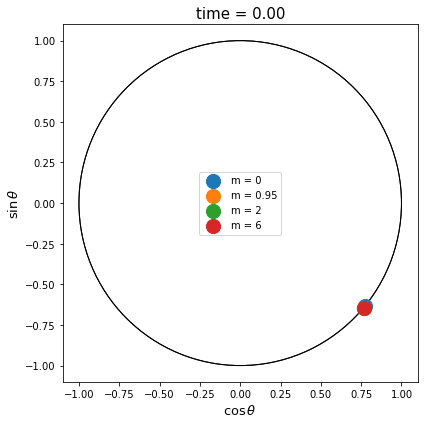

In [63]:
fig,ax = plt.subplots(1,figsize=(6,6))
draw = lambda x,label: ax.scatter(np.cos(x),np.sin(x),marker='o',s=200,label=label)#,color='#DC4838')
circle1 = plt.Circle((0, 0), 1, edgecolor='black',fill=False)
ax.add_patch(circle1)
def Draw(ax,num):
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlabel(r'$\cos\theta$',fontsize=13)
    ax.set_ylabel(r'$\sin\theta$',fontsize=13)
    ax.set_title(f'time = {t[num]:.02f}',fontsize=15)
    ax.add_patch(circle1)
num = 0
Draw(ax,num)
draw(theta0[num],'m = 0')
draw(theta_095[num],'m = 0.95')
draw(theta_2[num],'m = 2')
draw(theta_6[num],'m = 6')

ax.legend(loc=10)
plt.tight_layout()


In [58]:
def Animation(num):
    ax.clear()

    Draw(ax,num)
    draw(theta0[num],'m = 0')
    draw(theta_095[num],'m = 0.95')
    draw(theta_2[num],'m = 2')
    draw(theta_6[num],'m = 6')
    ax.legend(loc=10)
    

In [59]:
ani = FuncAnimation(fig,Animation,frames=np.arange(0,len(t),100),interval=100)


In [62]:
HTML(ani.to_jshtml())
ani.save(DF+"oscillator animation.mp4",dpi=400)